ข้อ 1.)



In [ ]:
import sklearn.datasets
import pandas as pd
#ดึง dataset ผ่าน fetch_openml
credit_g = sklearn.datasets.fetch_openml('credit-g')

df = pd.DataFrame(data=credit_g.data, columns=credit_g.feature_names)
df['target'] = credit_g.target

df

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=31
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=44096

  warn(warning_msg)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


ข้อ 2.)

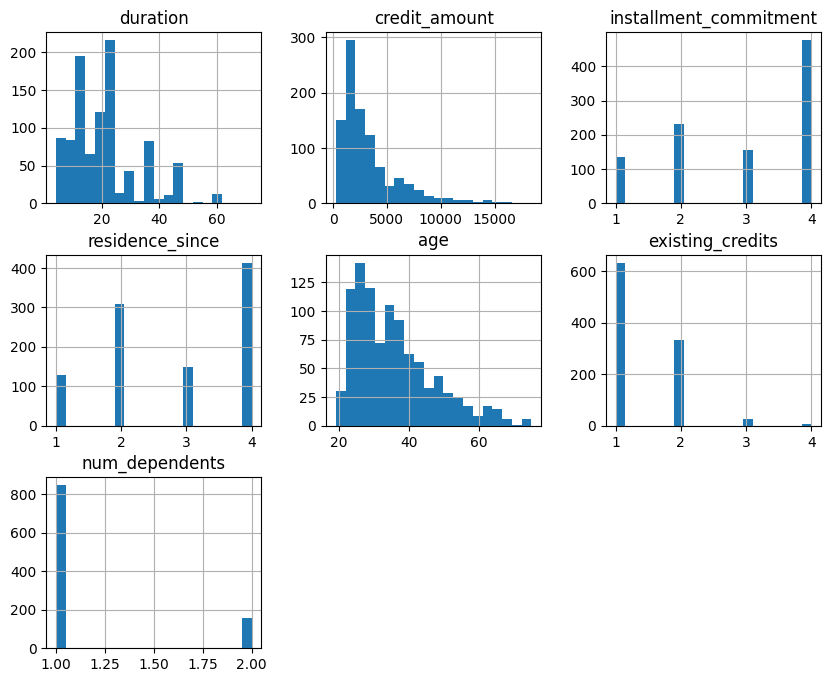

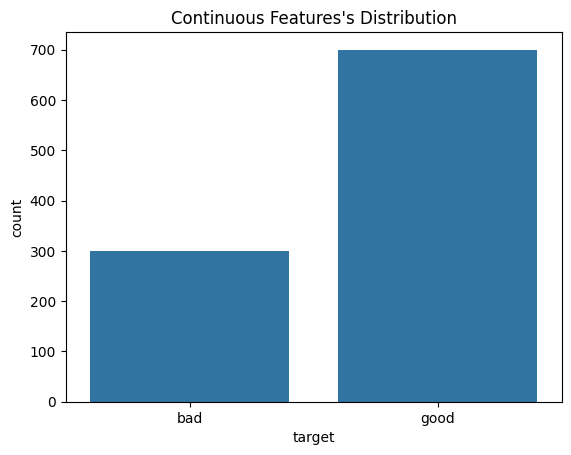

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#คัดเอาข้อมูลที่เป็นตัวเลข
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns

df[continuous_features].hist(figsize=(10, 8), bins=20)
plt.show()
#ตั้งชื่อให้ title ของกราฟ
sns.countplot(x='target', data=df)
plt.title('Continuous Features\'s Distribution')
plt.show()

ข้อ 3.)

In [ ]:
pip install --upgrade category_encoders

In [ ]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder()
#ใช้ OneHotEncoder แปลงข้อมูลเป็นตัวเลข
df_encoded = encoder.fit_transform(df)
#แปลงข้อมูลใน target เป็นตัวเลข โดยให้ 'good' เป็น 1 และ 'bad' เป็น 0
df_encoded['target'] = df['target'].astype(str)
df_encoded[df_encoded['target'] == 'good'] = 1
df_encoded[df_encoded['target'] == 'bad'] = 0

df_encoded

,checking_status_1,checking_status_2,checking_status_3,checking_status_4,duration,credit_history_1,credit_history_2,credit_history_3,credit_history_4,credit_history_5,...,job_3,job_4,num_dependents,own_telephone_1,own_telephone_2,foreign_worker_1,foreign_worker_2,target_1,target_2,target
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
996,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
997,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


ข้อ 4.)

In [ ]:
from sklearn.model_selection import train_test_split
#แบ่ง training set และ test set
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
#ทำเป็นตัวเลขเหมือนที่ทำก่อนหน้าด้วย OneHotEncoder
X_encode = encoder.fit_transform(X)
Y_encode = Y.replace({'good' : 1, 'bad' : 0})

X_train, X_test, Y_train, Y_test = train_test_split(X_encode, Y_encode, random_state=0)

ข้อ 5.)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
#สร้าง model ทั้งสามแบบ
logis = LogisticRegression().fit(X_train,Y_train)
svc = LinearSVC().fit(X_train,Y_train)
knn = KNeighborsClassifier().fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#พิมพ์คะแนนของแต่ละแบบออกมา
print("Logistic Regression :  {:.3f}".format(logis.score(X_train,Y_train)))
print("Linear SVC :  {:.3f}".format(svc.score(X_train,Y_train)))
print("KNN :  {:.3f}".format(knn.score(X_train,Y_train)))

Logistic Regression :  0.773
Linear SVC :  0.784
KNN :  0.761


ข้อ 6.)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#ปรับ scale ของข้อมูล
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)
#ให้แต่ละ model ใช้ข้อมูลที่ผ่านการปรับ scale แล้ว
logis = LogisticRegression().fit(X_train_scale,Y_train)
svc = LinearSVC().fit(X_train_scale,Y_train)
knn = KNeighborsClassifier().fit(X_train_scale,Y_train)

In [ ]:
#พิมพ์คะแนนของแต่ละแบบที่ใช้ข้อมูลที่ผ่านการปรับ scale
print("Logistic Regression (StandardScaler) :  {:.3f}".format(logis.score(X_train_scale,Y_train)))
print("Linear SVC (StandardScaler) :  {:.3f}".format(svc.score(X_train_scale,Y_train)))
print("KNN (StandardScaler) :  {:.3f}".format(knn.score(X_train_scale,Y_train)))

Logistic Regression (StandardScaler) :  0.791
Linear SVC (StandardScaler) :  0.788
KNN (StandardScaler) :  0.819


In [ ]:
#ให้ model แต่ละแบบใช่ test set แทน
logis = LogisticRegression().fit(X_test,Y_test)
svc = LinearSVC().fit(X_test,Y_test)
knn = KNeighborsClassifier().fit(X_test,Y_test)

print("Logistic Regression :  {:.3f}".format(logis.score(X_test,Y_test)))
print("Linear SVC :  {:.3f}".format(svc.score(X_test,Y_test)))
print("KNN :  {:.3f}".format(knn.score(X_test,Y_test)))

Logistic Regression :  0.780
Linear SVC :  0.824
KNN :  0.732


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ข้อ 7.)

In [ ]:
from sklearn.model_selection import GridSearchCV
#ค่า parameters สำหรับ Logristic Regression และ Linear SVC
param = {'penalty' :  ['l1' , 'l2'] , 'C' : [0.001 , 0.01 , 0.1 , 1 , 10 , 100 , 1000]}

logis_normal = LogisticRegression()
svc_normal = LinearSVC()
knn_normal = KNeighborsClassifier()
#ใช้ Grid Serach กับ Logristic Regression และ Linear SVC
logis_grid = GridSearchCV(logis_normal,param)
svc_grid = GridSearchCV(svc_normal,param)

In [ ]:
#ส่วนของ Logristic Regression (ใช้ข้อมูลที่ผ่านการปรับ scale แล้ว)
logis_grid.fit(X_train_scale,Y_train)
logis = LogisticRegression(penalty = 'l2' , C = 0.1).fit(X_train_scale,Y_train)

print("Logistic Regression :  ")
print("Best Penalty :  ",logis_grid.best_estimator_.get_params()['penalty'])
print("Best C :  ",logis_grid.best_estimator_.get_params()['C'])
print("Score :  {:.3f}".format(logis.score(X_train_scale,Y_train)))

Logistic Regression :  
Best Penalty :   l2
Best C :   0.1
Score :  0.797


In [ ]:
#ส่วนของ Linear SVC (ใช้ข้อมูลที่ผ่านการปรับ scale แล้ว)
svc_grid.fit(X_train_scale,Y_train)
svc =  LinearSVC(penalty = 'l2' , C = 0.1).fit(X_train_scale,Y_train)

print("Linear SVC :  ")
print("Best Penalty :  ",svc_grid.best_estimator_.get_params()['penalty'])
print("Best C :  ",svc_grid.best_estimator_.get_params()['C'])
print("Score :  {:.3f}".format(svc.score(X_train_scale,Y_train)))

Linear SVC :  
Best Penalty :   l1
Best C :   0.1
Score :  0.789


In [ ]:
#ค่า parameter ของ KNN model เพราะใช้เหมือนกับ Logristic Regression และ Linear SVC ไม่ได้
param = {'n_neighbors' : [1 , 3 , 5 , 7 , 9]}
knn_grid = GridSearchCV(knn_normal,param)

knn_grid.fit(X_train_scale,Y_train)
knn =  KNeighborsClassifier(n_neighbors = 9).fit(X_train_scale,Y_train)

print("KNN :  ")
print("Best Penalty :  ",knn_grid.best_estimator_.get_params()['n_neighbors'])
print("Score :  {:.3f}".format(knn.score(X_train_scale,Y_train)))

KNN :  
Best Penalty :   9
Score :  0.783


ข้อ 8.)

In [ ]:
import numpy as np
#เลือกข้อมูลที่ดีที่สุด 20 อันดับแรก
logis_best = np.abs(logis_grid.best_estimator_.coef_[0])
svc_best = np.abs(svc_grid.best_estimator_.coef_[0])

logis_best_feature = np.argsort(logis_best)[-20]
svc_best_feature = np.argsort(svc_best)[-20]

In [ ]:
print("Top 20 Logistic Regression features:")
print(X_train.columns[logis_best_feature])

print("Top 20 Linear SVC features:")
print(X_train.columns[svc_best_feature])

Top 20 Logistic Regression features:
employment_3
Top 20 Linear SVC features:
own_telephone_2


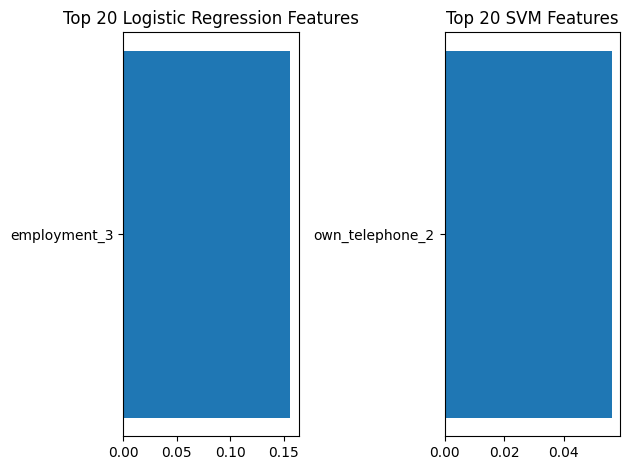

In [ ]:
#plot กราฟของทั้งสองแบบ
plt.subplot(1, 2, 1)
plt.barh(X_train.columns[logis_best_feature], logis_best[logis_best_feature])
plt.title('Top 20 Logistic Regression Features')

plt.subplot(1, 2, 2)
plt.barh(X_train.columns[svc_best_feature], svc_best[svc_best_feature])
plt.title('Top 20 SVM Features')

plt.tight_layout()
plt.show()